<a href="https://colab.research.google.com/github/limjunghyeon/ESAA_py/blob/main/ESAA_03_27_87_117ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#01 사이킷런 소개와 특징

:사이킷런은 파이썬머신러닝 라이브러리 중 가장많이 사용되는라이브러리

**특징**

1. 파이썬 기반의 다른 머신러닝 패키지도 사이킷런 스타일의 API를 지향할 정도로 쉽고 가장 파이썬스러운 API 제공
2. 머신러닝을 위한 매우 다양한 알고리즘 개발을 위한 편리한 프레임워크와 API 제공
3. 오랜 시간 실전 환경에서 검증 됐으며, 매우 많은 환경에서 사용되는 성숙한 라이브러리


아나콘다 설치시 기본으로 설치 완료되기에 별다른 설치 필요 없음.

별도로 설치시 conda 셋업할 것 권장

(방법1. conda install scikit-learn  /  
방법2. pip install scikit-learn)

In [5]:
import sklearn
print(sklearn.__version__)

1.2.2


# 첫번째 머신러닝 만들어보기 -붓꽃 품종 예측

데이터 세트 : 꽃잎의 길이와 너비, 꽃받침의 길이와 너비 피처를 기반으로 꽃의 품종 예측하기 위한 것.

분류는대표적인 지도 학습.


*지도 학습

: 학습을 위한 다양한 피처와 분류 결정값인 레이블 데이터로 모델을 학습한 뒤, 별도의 테스트 데이터 세트에서 미지의 레이블 예측. (명확한 답 있는 데이터 학습 후 미지의 정답 예측)

주어진 데이터 세트 -> 학습 데이터 세트

머신러닝 모델의 예측 성능 평가하기 위해 별도로 주어진 데이터 세트 -> 테스트 데이터 세트


-sklearn.datasets: 사이킷런에서 자체적으로 제공하는 데이터 세트를 생성하는 모듈의 모임

-sklearn.tree : 트리 기반 ML 알고리즘을 구현한 클래스의 모임

-sklearn.model_selection: 학습 데이터와 검증 데이터. 예측 데이터로 데이터를 분리하거나 최적의 하이퍼 파라미터로 평가하기 위한 다양한 모듈의 모임. (하이퍼 파라미터: 머신러닝 알고리즘별로 최적의 학습을 위해 직접 입력하는 파라미터들을 통칭. 머신러닝 알고리즘 성능 튜닝 가능)

In [6]:
#train_test_split() : 학습데이터와 테스트 데이터 분리 함수

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [13]:
import pandas as pd

#붓꽃 데이터 세트 로딩
iris=load_iris()

#iris.data는 Iris 데이터 세트에서 feature만으로 된 데이터를 numpy로 갖고 있음
iris_data=iris.data

#iris.target은 붓꽃 데이터 세트에서 레이블 데이터를 numpy로 갖고 있음
iris_label=iris.target
print('iris target값:', iris_label)
print('iris target명:', iris.target_names)

#붓꽃 데이터 세트를 자세히 보기 위해 DataFrame으로 변환
iris_df=pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df['label']=iris.target
iris_df.head(3)

iris target값: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target명: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


피처 : separ lenth~ petal width - 총 4개
레이블 은 0,1,2 3개

**학습 데이터 확보**

In [15]:
#train_test_split() : 학습데이터와 테스트 데이터를 test_size 파라미터 입력 값의 비율로 쉽게 분할
x_train, x_test, y_train, y_test= train_test_split(iris_data, iris_label, test_size=0.2, random_state=11) 

#iris_data: 피처 데이터 세트 , iris_lable: 레이블 데이터 세트. test_size: 전체 데이터 세트 중 테스트 데이터  세트의 비율, random_state: 호출할 때 마다 같은 학습/테스트 용 데이터 세트 생성하기 위해 주어지는 난수 발생 값
#train_test_split() 은 호출 시 무작위로 데이터 분리. random_state 지정하지 않으면 수행마다 다른 학습/테스트용 데이터 생성 가능


**의사결정 트리 이용해 학습**

In [20]:
#DecisionTreeClassifier  객체 생성
dt_clf=DecisionTreeClassifier(random_state=11)

#학습 수행
dt_clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=11)

**예측**

반드시 학습데이터가 아닌 다른 데이터. 일반적으로 테스트 데이터 세트

In [22]:
#학습이 완료된 DecisionTreeClassifier 객체에서 테스트 데이터 세트로 예측 수행

pred=dt_clf.predict(x_test)

**예측 성능 평가**

정확도 측정( 예측값과 실제 레이블 값 얼마나 정확?)

accuracy_score(실제 데이터 레이블 세트, 예측 레이블 데이터 세트)

In [24]:
from sklearn.metrics import accuracy_score
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

예측 정확도: 0.9333


#예측 프로세스 단계 정리

1. 데이터 세트 분리 : 학습데이터, 테스트 데이터
2. 모델 학습: 학습 데이터 기반으로 ML알고리즘 적용해 모델 학습
3. 예측 수행 : 학습된 ML 모델 이용해 테스트 데이터 분류를 예측
4. 평가 : 예측 결괏값과 테이터 실제 결과 비교해 성능 평가

#03 사이킷런의 기반 프레임 워크 익히기

**Estimator 이해 및 fit(), predict() 메서드**

 -fit : ML 모델 학습

 -predict : 학습된 모델 예측

 -Estimator 클래스 : Classifier(분류 알고리즘 구현한 클래스) + Regressor(회귀 알고리즘 구현한 알고리즘)

 **cross_var_score()** :evalution함수, GridSearchCV와 같은 하이터 파라미터 튜닝을 지원하는 클래스. Estimator을 인자로



 #사이킷런의 주요 모듈



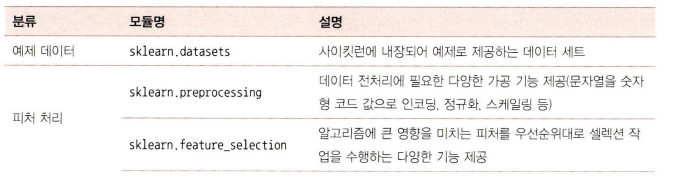

 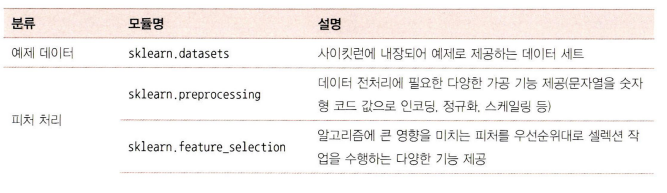

 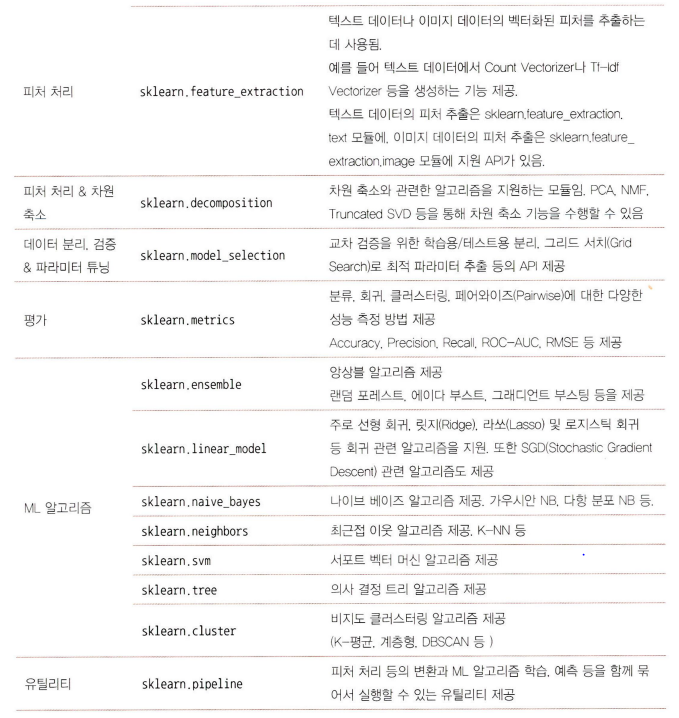

#내장된 예제 데이터 세트

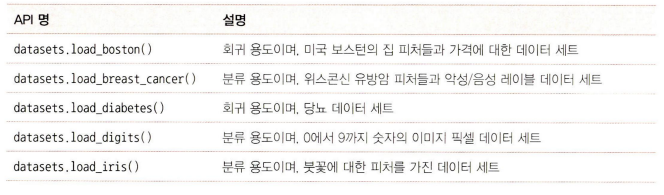

fetch 계열 명령은 데이터 크기가 커서 인터넷에서 내려받아야함

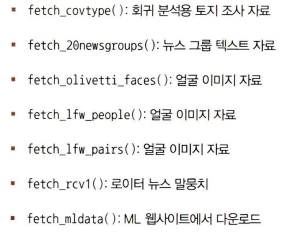

**datasets.make_classifications()**

:분류를 위한 데이터 세트를 민듦. 특히 높은 상관도, 불필요한 속성 등의 노이즈 효과를 위한 데이터를 무작위 생성


**datasets.make_blobs**


:클러스터링을 위한 데이터 세트를 무작위로 생성. 군집 지정 개수에 따라 여러가지 클러스터링을 위한 데이터 세트 쉽게 만들어줌.

**키**

-data : 피처의 데이터 세트

-target: 분류시 레이블 값, 회귀일 때 숫자 결과값 데이터 세트

-target_names : 개별 레이블 이름

-feature_names: 피처 이름

-DESCR 데이터 세트에 대한 설명과 각 피처의 설명

In [26]:
from sklearn.datasets import load_iris
iris_data=load_iris()
print(type(iris_data))

<class 'sklearn.utils._bunch.Bunch'>


In [28]:
keys=iris_data.keys()
print('붓꽃 데이터 세트의 키들:', keys)

붓꽃 데이터 세트의 키들: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [29]:
print('\n feature_names 의 type:',type(iris_data.feature_names))
print(' feature_names 의 shape:',len(iris_data.feature_names))
print(iris_data.feature_names)

print('\n target_names 의 type:',type(iris_data.target_names))
print(' feature_names 의 shape:',len(iris_data.target_names))
print(iris_data.target_names)

print('\n data 의 type:',type(iris_data.data))
print(' data 의 shape:',iris_data.data.shape)
print(iris_data['data'])

print('\n target 의 type:',type(iris_data.target))
print(' target 의 shape:',iris_data.target.shape)
print(iris_data.target)


 feature_names 의 type: <class 'list'>
 feature_names 의 shape: 4
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

 target_names 의 type: <class 'numpy.ndarray'>
 feature_names 의 shape: 3
['setosa' 'versicolor' 'virginica']

 data 의 type: <class 'numpy.ndarray'>
 data 의 shape: (150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0

#04 Model  Selection 모듈 소개

train_test_split(): 학습/테스트 데이터 분리

**파라미터**

1. test_size: 전체에서 테스트 데이터 세트 크기. 디폴트는 0.25
2. train_size: 전체에서 학습용 데이터 세트 크기
3. shuffle: 데이터 섞을건지. 디폴트는 True
4. random_state: 호출할 때마다 동일한 데이터 세트 생성하기 위한 난수


해당 반환값은 튜플형태

In [31]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

iris=load_iris()
dt_clf=DecisionTreeClassifier()
train_data=iris.data
train_label=iris.target
dt_clf.fit(train_data, train_label)

#학습데이터 세트로 예측 수행
pred=dt_clf.predict(train_data)
print('예측정확도:', accuracy_score(train_label, pred))

#예측 정확도 100% : 오류. 이미 학습 데이터 세트 기반 예측해기 때문

예측정확도: 1.0


In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

dt_clf=DecisionTreeClassifier()
iris=load_iris()

x_train,x_test, y_train, y_test=train_test_split(iris_data.data, iris_data.target,test_size=0.3, random_state=121)
dt_clf.fit(x_train, y_train)
pred=dt_clf.predict(x_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.9556


#교차 검증

**K폴드 교차 검증**

:K개의 데이터 폴드세트 만들어서 K번만큼 각 폴드 세트에 학습과 검증 평가 반복적 수행

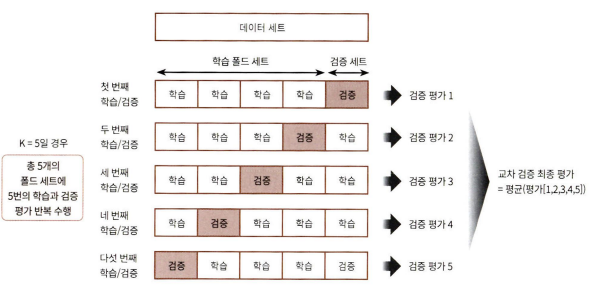

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import numpy as np

iris=load_iris()
features=iris.data
label=iris.target
dt_clf=DecisionTreeClassifier(random_state=156)

#5개의 폴드 세트로 분리하는 KFold 객체와 폴드 세트별 정확도를 담을 리스트 객체 생성
kfold=KFold(n_splits=5)
cv_accuracy=[]
print('붓꽃 데이터 세트 크기:', features.shape[0])

붓꽃 데이터 세트 크기: 150


In [38]:
n_iter=0
#KFold 객체의 split()를 호출 시 폴드 별 학습용, 검증용 테스트의 로우 인덱스를 array로 변환
for train_index, test_index in kfold.split(features):
  #Kfold.split()으로 반환된 인덱스를 이용해 학습용 검증용 테스트 데이터 추출
  x_train, x_test=features[train_index],features[test_index]
  y_train,y_test=label[train_index],label[test_index]
  #학습 및 예측
  dt_clf.fit(x_train, y_train)
  pred=dt_clf.predict(x_test)
  n_iter+=1
  #반복 시 마다 정확도 측정
  accuracy=np.round(accuracy_score(y_test, pred),4)
  train_size=x_train.shape[0]
  test_size=x_test.shape[0]
  print('\n#{0} 교차검증정확도 :{1}, 학습데이터크기: {2}, 검증데이터크기: {3}'.format(n_iter, accuracy, train_size,test_size))
  print('#{0} 검증세트인덱스 :{1}'.format(n_iter, test_index))
  cv_accuracy.append(accuracy)

#개별 iteration별 정확도를 합하여 평균 정확도 계산
print('\n## 평균검증정확도: ', np.mean(cv_accuracy))


#1 교차검증정확도 :1.0, 학습데이터크기: 120, 검증데이터크기: 30
#1 검증세트인덱스 :[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

#2 교차검증정확도 :0.9667, 학습데이터크기: 120, 검증데이터크기: 30
#2 검증세트인덱스 :[30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

#3 교차검증정확도 :0.8667, 학습데이터크기: 120, 검증데이터크기: 30
#3 검증세트인덱스 :[60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

#4 교차검증정확도 :0.9333, 학습데이터크기: 120, 검증데이터크기: 30
#4 검증세트인덱스 :[ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

#5 교차검증정확도 :0.7333, 학습데이터크기: 120, 검증데이터크기: 30
#5 검증세트인덱스 :[120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

## 평균검증정확도:  0.9


**Stratified K 폴드**

K폴드가 레이블 데이터 집합이 원본 데이터 집합의 레이블 분포를 학습 및 테스트 세트에 제대로 분배하지 못하는 경우의 문제 해결.

원본 데이터 레이블 분포를 먼저 고려한 뒤 이 분포와 동일하게 학습과 검증 데이터 세트 분배.


In [40]:
import pandas as pd


iris=load_iris()
iris_df=pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['label']=iris.target
iris_df['label'].value_counts()

0    50
1    50
2    50
Name: label, dtype: int64

위에서 레이블 값 모두 50.
Setosa, Versicolor, Virginca 품종 모두 50개


In [42]:
kfold=KFold(n_splits=3)
n_iter=0
for train_index, test_index in kfold.split(iris_df):
  n_iter+=1
  label_train=iris_df['label'].iloc[train_index]
  label_test=iris_df['label'].iloc[test_index]
  print('##교차검증: {0}'.format(n_iter))
  print('학습 레이블 데이터 분포:\n', label_train.value_counts())
  print('검증 레이블 데이터 분포:\n', label_test.value_counts())

##교차검증: 1
학습 레이블 데이터 분포:
 1    50
2    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    50
Name: label, dtype: int64
##교차검증: 2
학습 레이블 데이터 분포:
 0    50
2    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    50
Name: label, dtype: int64
##교차검증: 3
학습 레이블 데이터 분포:
 0    50
1    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 2    50
Name: label, dtype: int64


In [44]:
#p108~109
from sklearn.model_selection import StratifiedKFold

skf=StratifiedKFold(n_splits=3)
n_iter=0

for train_index, test_index in skf.split(iris_df, iris_df['label']):
  n_iter+=1
  label_train=iris_df['label'].iloc[train_index]
  label_test=iris_df['label'].iloc[test_index]
  print('##교차검증: {0}'.format(n_iter))
  print('학습 레이블 데이터 분포: \n', label_train.value_counts())
  print('검증 레이블 데이터 분포: \n', label_test.value_counts())

##교차검증: 1
학습 레이블 데이터 분포: 
 2    34
0    33
1    33
Name: label, dtype: int64
검증 레이블 데이터 분포: 
 0    17
1    17
2    16
Name: label, dtype: int64
##교차검증: 2
학습 레이블 데이터 분포: 
 1    34
0    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포: 
 0    17
2    17
1    16
Name: label, dtype: int64
##교차검증: 3
학습 레이블 데이터 분포: 
 0    34
1    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포: 
 1    17
2    17
0    16
Name: label, dtype: int64


In [46]:
dt_clf=DecisionTreeClassifier(random_state=156)

skfold=StratifiedKFold(n_splits=3)
n_iter=0
cv_accuracy=[]

#StratifiedKFold의 split()호출 시 반드시 레이블 데이터 세트도 추가 입력 필요
for train_index, test_index in skfold.split(features, label):

  #split()으로 반환된 인덱스를 이용해 학습용 검증용 테스트 데이터 추출
  X_train, X_test=features[train_index],features[test_index]
  y_train, y_test=label[train_index],label[test_index]

  #학습 및 예측
  dt_clf.fit(X_train, y_train)
  pred=dt_clf.predict(X_test)

  #반복 시 마다 정확도 측정
  n_iter+=1
  accuracy=np.round(accuracy_score(y_test, pred),4)
  train_size=X_train.shape[0]
  test_size=X_test.shape[0]

  print('\n#{0} 교차검증정확도 :{1}, 학습데이터크기: {2}, 검증데이터크기: {3}'.format(n_iter, accuracy, train_size,test_size))
  print('#{0} 검증세트인덱스 :{1}'.format(n_iter, test_index))
  
  cv_accuracy.append(accuracy)

  #교차검증별 정확도 및 평균 정확도 
print('\n## 교차검증별 정확도: ', np.round(cv_accuracy, 4))
print('\n## 평균검증정확도: ', np.mean(cv_accuracy))



#1 교차검증정확도 :0.98, 학습데이터크기: 100, 검증데이터크기: 50
#1 검증세트인덱스 :[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]

#2 교차검증정확도 :0.94, 학습데이터크기: 100, 검증데이터크기: 50
#2 검증세트인덱스 :[ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]

#3 교차검증정확도 :0.98, 학습데이터크기: 100, 검증데이터크기: 50
#3 검증세트인덱스 :[ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]

## 교차검증별 정확도:  [0.98 0.94 0.98]

## 평균검증정확도:  0.9666666666666667


#교차검증을 보다 간편하게 - cross_val_score()

1. 폴드 세트 설정
2. for 루프에서 반복으로 학습 및 테스트 데이터의 인덱스 추출
3. 반복적으로 학습과 예측을 수행하고 예측 성능 반환

cross_val_score(estimator, X, y=None, scoring=None, cv=None, n_jobs=1, verbose=0, fit_params=None, pre_dispatch=2*n_jobs)

이 중 estimatior. X, y, scoring, cv가 주요 파라미터


-estimator : classfifier 또는 regressor/ X: 피처 데이터 세트 / y: 레이블 데이터 세트/ scoring : 예측 성능 평가 지표/ cv: 교차 검증 폴드 수


-수행 후 반환값은 scoring 파라미터로 지정된 성능 지표 측정값을 배열 형태로 반환.

-classifier가 입력되면 stratified k 폴드 방식으로 레이블 값의 분포에 따라 학습/테스트 세트 분할. 회귀인 경우 분할 할 수 없으므로 K 폴드 방식으로 분할

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.datasets import load_iris

iris_data=load_iris()
df_clf=DecisionTreeClassifier(random_state=156)

data=iris_data.data
label=iris_data.target

#성능지표는 정확도(accuracy), 교차 검증 세트는 3개
scores= cross_val_score(df_clf, data, label,scoring='accuracy', cv=3)
print('교차 검증별 정확도:', np.round(scores, 4))
print('평균 검증 정확도:', np.round(np.mean(scores),4))

교차 검증별 정확도: [0.98 0.94 0.98]
평균 검증 정확도: 0.9667


**GridSearchCV - 교차 검증과 최적 하이퍼 파라미터 튜닝을 한번에**



In [51]:
grid_parameters={'max_depth':[1,2,3], 'min_samples_split':[2,3]}

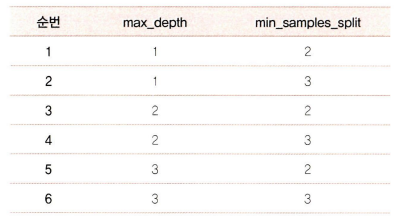

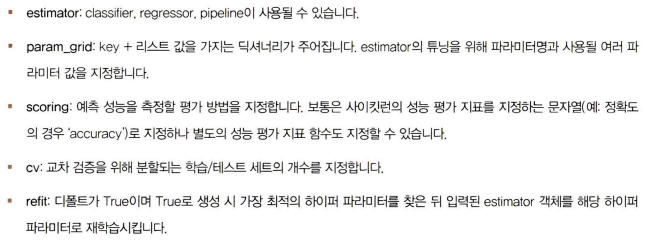

In [58]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

#data loading and seperating train data& test data
iris=load_iris()
X_train, X_test, y_train, y_test= train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=121)

dtree = DecisionTreeClassifier()

###파라미터를 딕셔너리 형태로 설정
parameters= {'max_depth':[1,2,3], 'min_samples_split':[2,3]}

In [62]:
import pandas as pd

#paran_grid의 하이퍼 파라미터를 3개의 train, test set fold 로 나눠 테스트 수행 설정.
###rehit=True가 default. True이면 가장 좋은 파라미터 설정으로 재학습

grid_dtree=GridSearchCV(dtree, param_grid=parameters,cv=3, refit=True)

#붓꽃 학습 데이터로 param_grid의 하이퍼 파라미터 순차적 학습/평가
grid_dtree.fit(X_train, y_train)

#GridSearchCV 결과를 추출해 DataFrame으로 변환
scores_df=pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score','split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5,0.700,0.7,0.70
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5,0.700,0.7,0.70
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0,0.95
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0,0.95
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.95
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.95


-params 칼럼에는 수행마다 적용된 개별 하이퍼 파라미터 값
-rank_test_score은 하이퍼 파라미터별로 성능이 좋은 score 순위 나타냄. 1이 가장 뛰어난 순위.=최적
-mean_test_score는 개별 하이퍼 파라미터별로 CV 폴딩 테스트 세트에 대해 총 수행한 평가 평균값

In [63]:
print('gridserachCV 최적파라미터: ', grid_dtree.best_params_)
print('gridserachCV 최고 정확도: {0:.4f}'.format(grid_dtree.best_score_))

gridserachCV 최적파라미터:  {'max_depth': 3, 'min_samples_split': 2}
gridserachCV 최고 정확도: 0.9750


In [64]:
#gridserachcv의 refit으로이미학습된 estimator 반환
estimator= grid_dtree.best_estimator_

#gridserachcv의 best_estimator는이미 최적학습이 됐으므로 별도 학습 필요X
pred=estimator.predict(X_test)
print('테스트데이터세트정확도:{0:.4f}'.format(accuracy_score(y_test, pred)))

테스트데이터세트정확도:0.9667
